# **Packages Import**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# **Business & Data Understaning**

In [ ]:
df=pd.read_csv("/content/airline-passengers.csv")
df.head()

In [ ]:
df.shape

(144, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


*   The data ranges from **January** **1949** to **December** **1960**, or **12 years**, with ***144 observations***;
*   No Null Values in this dataset;




# **Data Preparation**

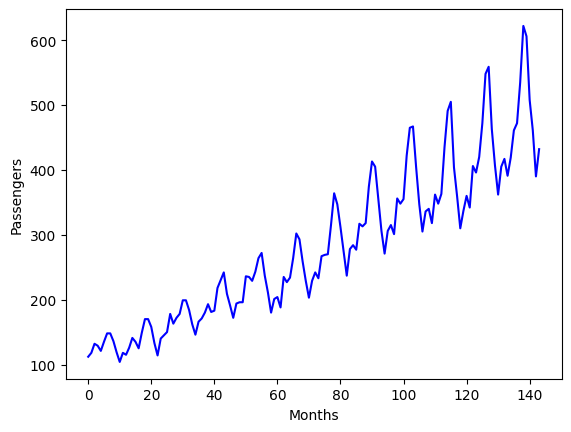

In [ ]:
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.plot(df['Passengers'], color='blue')
plt.show()

We have to split now, our data into train & validation sets. \\
Generally, we use** 80% for training** and **20% for validation**.


In [ ]:
training_size = int(len(df['Passengers'])*0.8)
training_size

115

In [ ]:
def load_data(data, seq_len):
    x = []
    y = []
    for i in range(seq_len, len(data)):
        x.append(data.iloc[i-seq_len : i, 1])
        y.append(data.iloc[i,1])
    return x,y

In [ ]:
x, y = load_data(df, 20)

In [ ]:
len(x)

124

In [ ]:
x_train = x[:training_size]
y_train = y[:training_size]
x_test = x[training_size:]
y_test = y[training_size:]

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (115, 20)
y_train.shape =  (115,)
x_test.shape =  (9, 20)
y_test.shape =  (9,)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
y_pred=reg.predict(x_test)

In [ ]:
y_pred

array([416.41729878, 477.6620036 , 533.62705472, 612.6023525 ,
       620.42919617, 512.77167543, 435.03516162, 415.62842113,
       436.9625497 ])

In [ ]:
y_test

array([461, 472, 535, 622, 606, 508, 461, 390, 432])

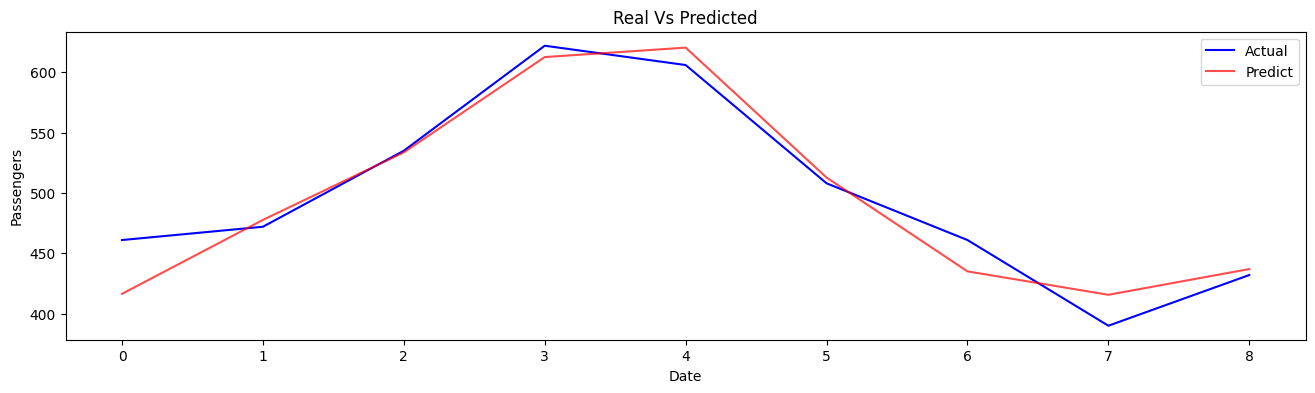

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(y_test, color='blue',label='Actual')
plt.plot(y_pred, alpha=0.7, color='red',label='Predict')
plt.title('Real Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

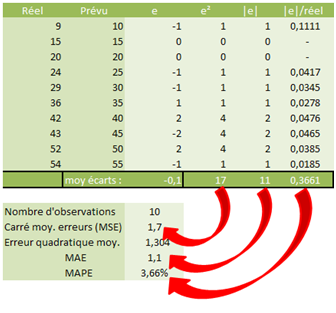

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
mape = np.round(np.mean(np.abs(y_test-y_pred)/y_test)*100,2)

In [ ]:
rmse
mape